# ARIMA Forecasting
## Forecasting Dividends for Each Company
The code below will go through each csv file (with each file containing dividends for each company) and fit an ARIMA model.

First, the dividends are loaded into a Pandas DataFrame. Then, since the data is not stationary, the first difference is calculated. This for the most part makes the dividends data for all of the companys stationary.

Next, the data is split, with the first 70% being training data and the other 30% being test data which will be used for testing the accuracy of the forecasts the model predicts.

For each company, the MSE is printed and a graph is produced that shows both the predicted dividends from the model and the actual dividends.

For simplicity, the order of each ARIMA model is 1, 1, 1. 

In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [2]:
dividend_files = os.listdir('../data/series/good')

In [3]:
warnings.filterwarnings('ignore')

ABM - Testing Mean Squared Error - 0.00001


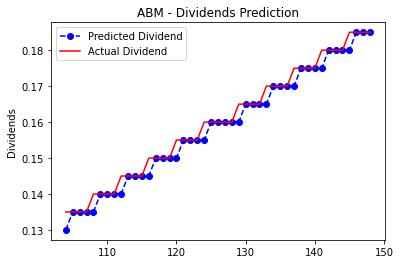

ABT - Testing Mean Squared Error - 0.00049


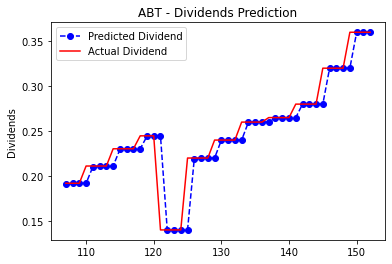

ADM - Testing Mean Squared Error - 0.00048


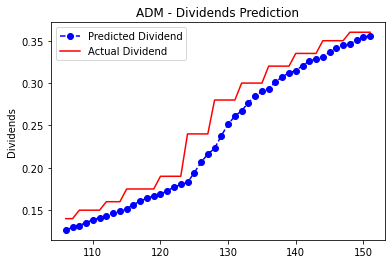

ADP - Testing Mean Squared Error - 0.00096


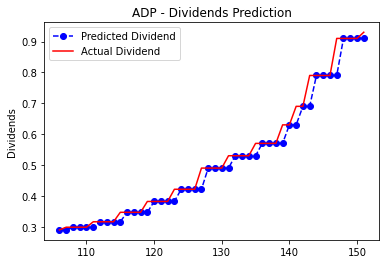

AFL - Testing Mean Squared Error - 0.00005


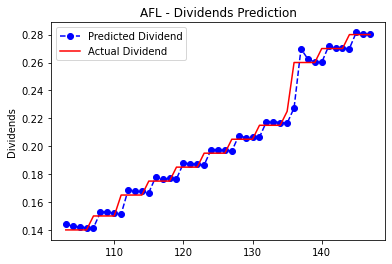

ALB - Testing Mean Squared Error - 0.00024


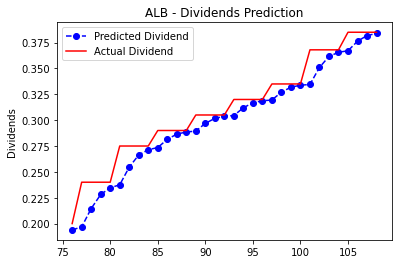

AOS - Testing Mean Squared Error - 0.00014


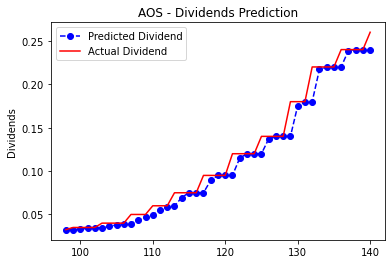

APD - Testing Mean Squared Error - 0.00184


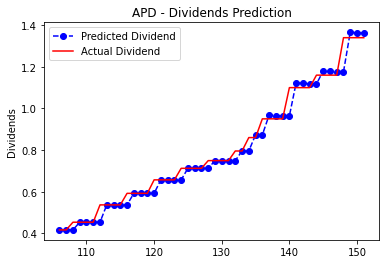

AROW - Testing Mean Squared Error - 0.00001


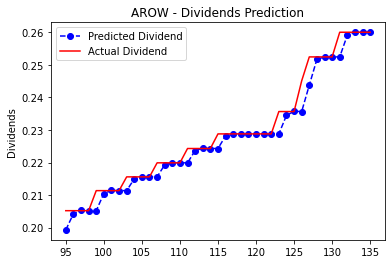

ARTNA - Testing Mean Squared Error - 0.00002


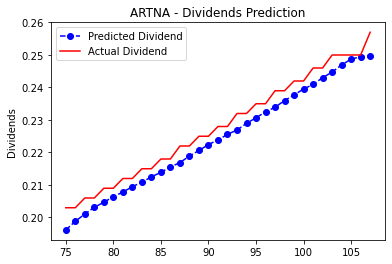

ATO - Testing Mean Squared Error - 0.00027


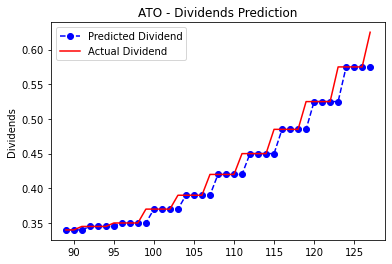

ATR - Testing Mean Squared Error - 0.00010


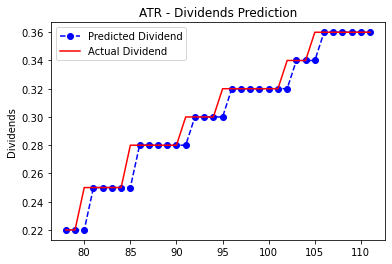

AWR - Testing Mean Squared Error - 0.00012


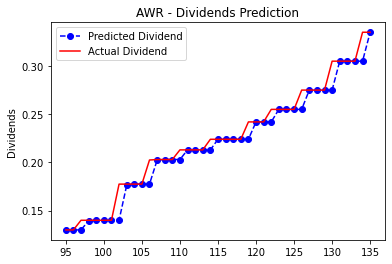

BANF - Testing Mean Squared Error - 0.00028


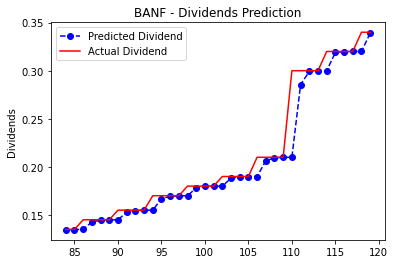

BDX - Testing Mean Squared Error - 0.00047


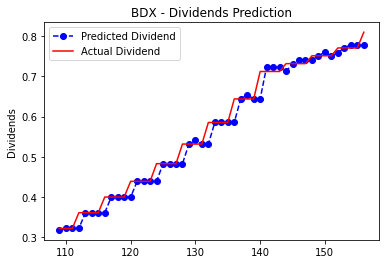

BEN - Testing Mean Squared Error - 0.24832


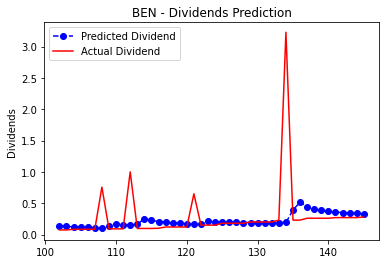

BKH - Testing Mean Squared Error - 0.00012


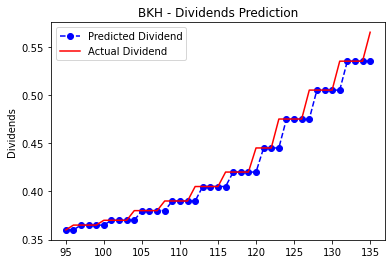

BMI - Testing Mean Squared Error - 0.00004


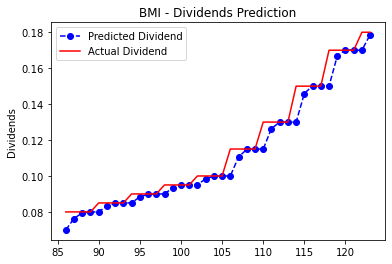

BMS - Testing Mean Squared Error - 0.00246


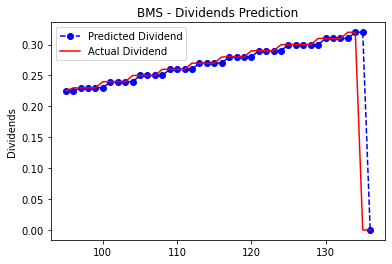

BRC - Testing Mean Squared Error - 0.00000


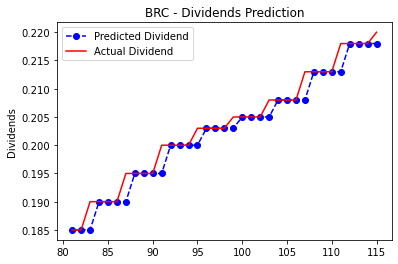

BRO - Testing Mean Squared Error - 0.00001


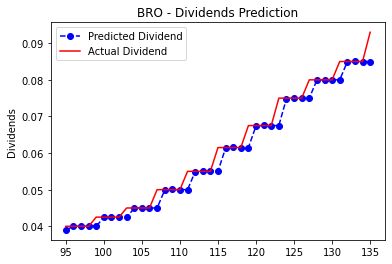

CAT - Testing Mean Squared Error - 0.00120


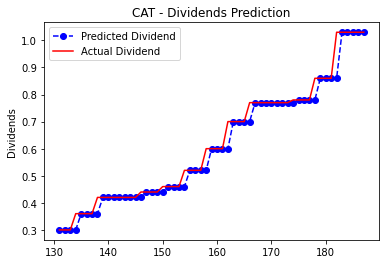

CBSH - Testing Mean Squared Error - 0.06074


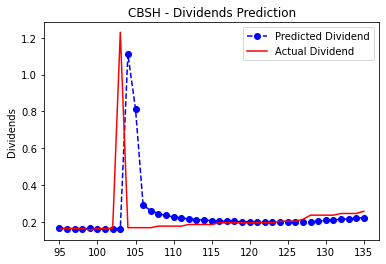

CBU - Testing Mean Squared Error - 0.00200


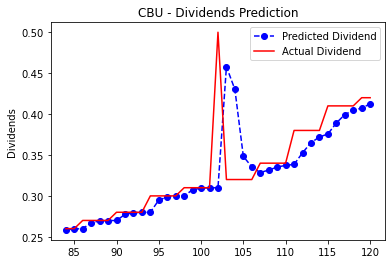

CB - Testing Mean Squared Error - 0.00047


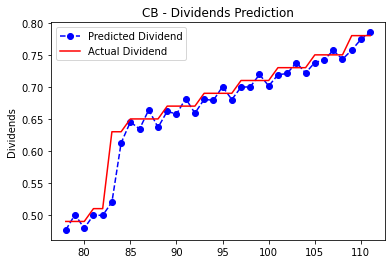

CFR - Testing Mean Squared Error - 0.00041


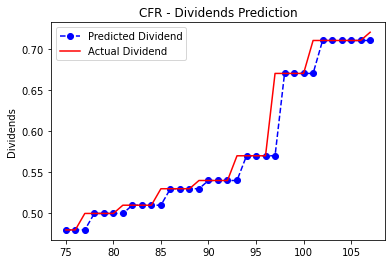

CHD - Testing Mean Squared Error - 0.00009


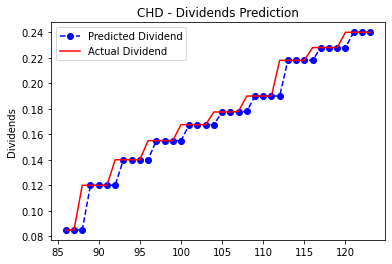

CINF - Testing Mean Squared Error - 0.00014


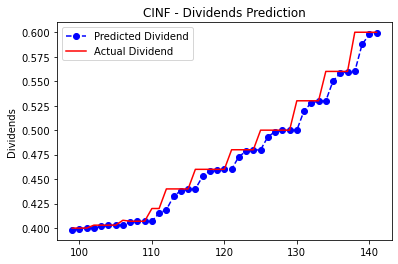

CLX - Testing Mean Squared Error - 0.00094


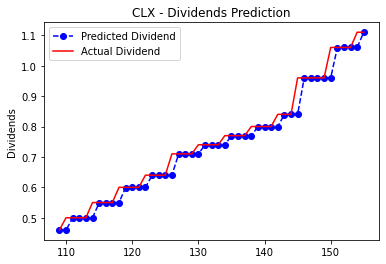

CL - Testing Mean Squared Error - 0.00012


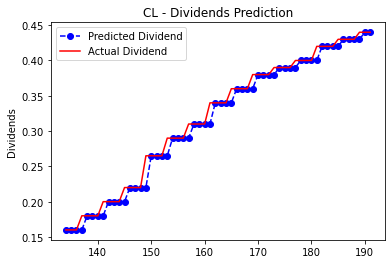

CNI - Testing Mean Squared Error - 0.00041


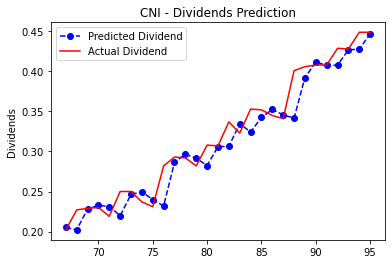

CPKF - Testing Mean Squared Error - 0.00001


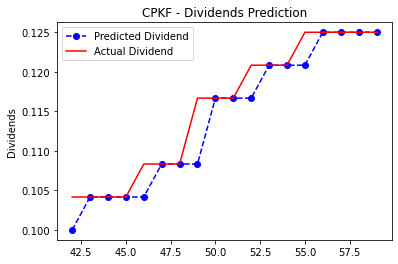

CSL - Testing Mean Squared Error - 0.00046


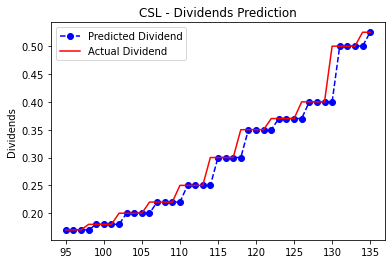

CSVI - Testing Mean Squared Error - 0.02573


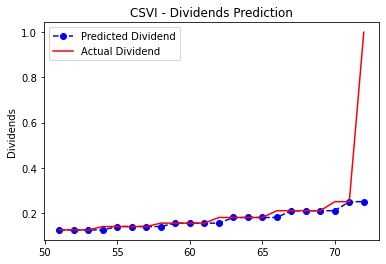

CTAS - Testing Mean Squared Error - 0.06917


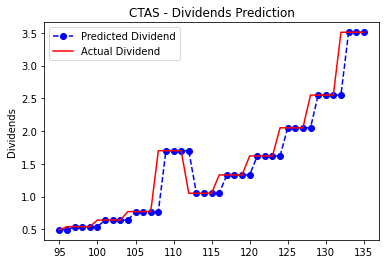

CTBI - Testing Mean Squared Error - 0.00005


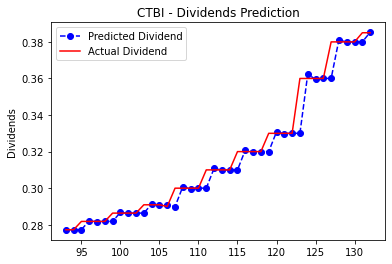

CVX - Testing Mean Squared Error - 0.00094


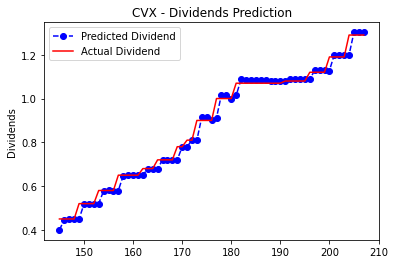

CWT - Testing Mean Squared Error - 0.00002


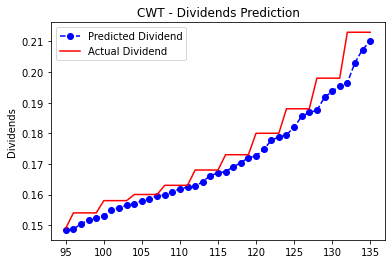

DBD - Testing Mean Squared Error - 0.00104


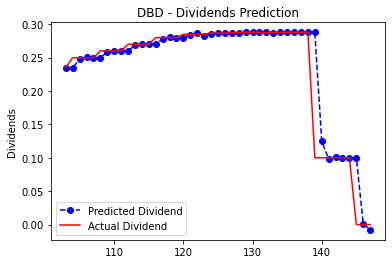

DCI - Testing Mean Squared Error - 0.00007


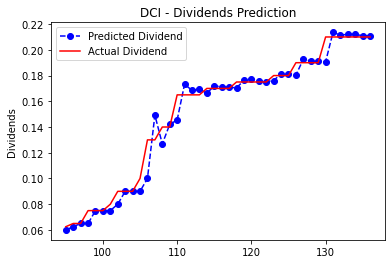

DOV - Testing Mean Squared Error - 0.00031


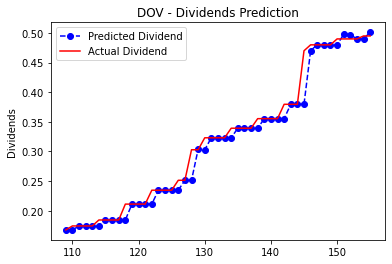

EBTC - Testing Mean Squared Error - 0.00003


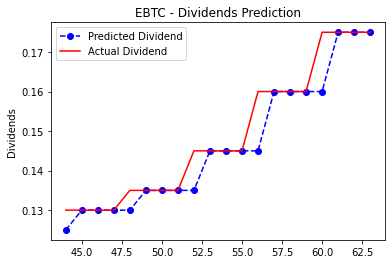

ECL - Testing Mean Squared Error - 0.00029


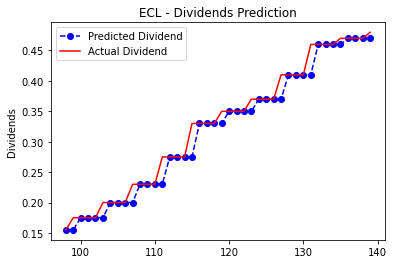

ED - Testing Mean Squared Error - 0.00007


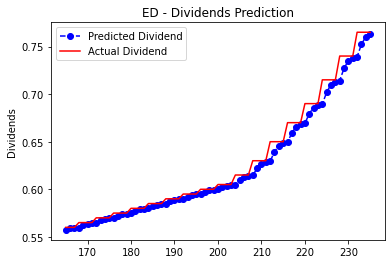

EFSI - Testing Mean Squared Error - 0.00003


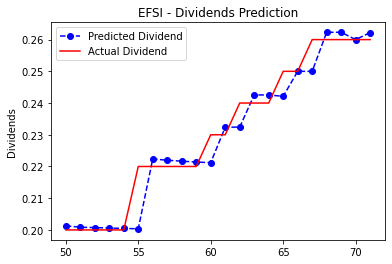

EGN - Testing Mean Squared Error - 0.00045


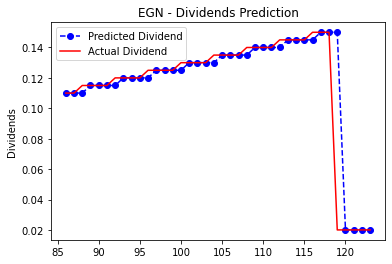

EMR - Testing Mean Squared Error - 0.00016


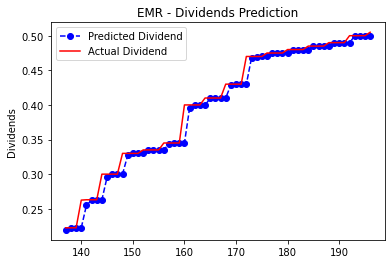

ENB - Testing Mean Squared Error - 0.01520


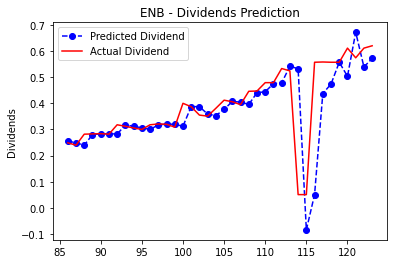

ERIE - Testing Mean Squared Error - 0.10191


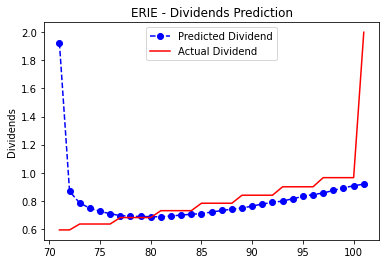

ESS - Testing Mean Squared Error - 0.00389


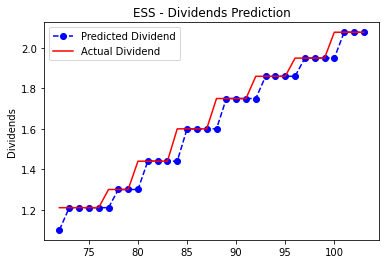

EXPD - Testing Mean Squared Error - 0.00024


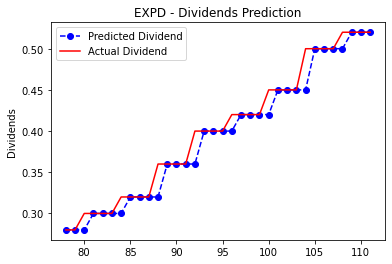

FELE - Testing Mean Squared Error - 0.00168


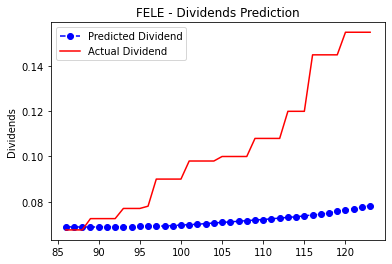

FFMR - Testing Mean Squared Error - 0.00004


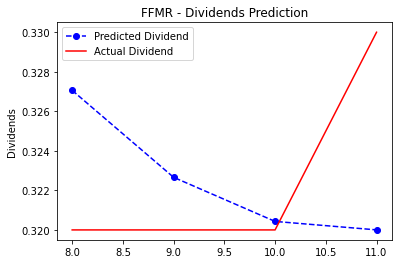

FLIC - Testing Mean Squared Error - 0.00003


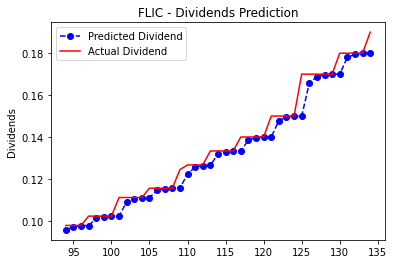

FMCB - Testing Mean Squared Error - 0.02913


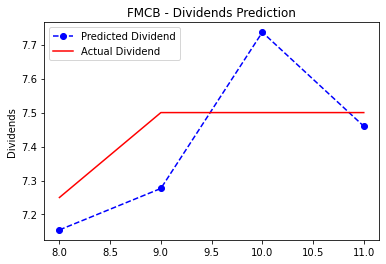

FRT - Testing Mean Squared Error - 0.00120


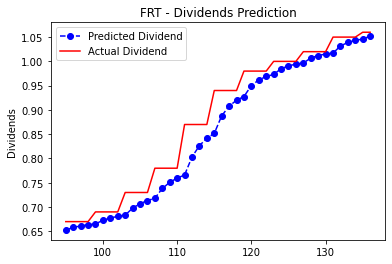

FUL - Testing Mean Squared Error - 0.00003


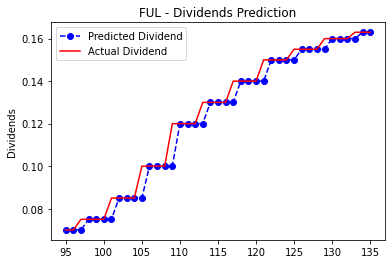

GD - Testing Mean Squared Error - 0.00172


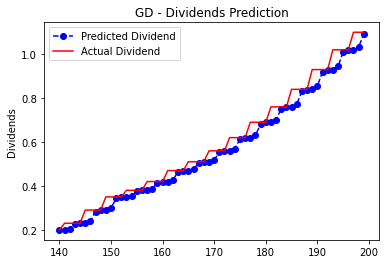

GPC - Testing Mean Squared Error - 0.00030


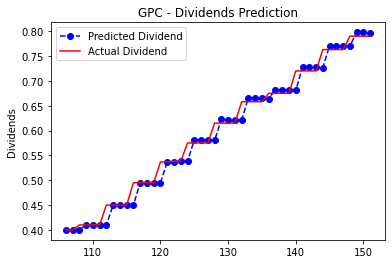

GRC - Testing Mean Squared Error - 0.23224


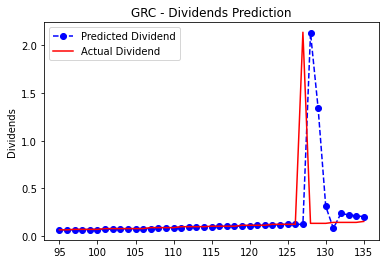

GWW - Testing Mean Squared Error - 0.00261


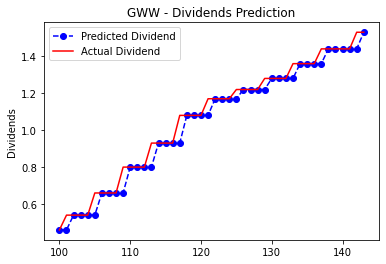

HP - Testing Mean Squared Error - 0.06506


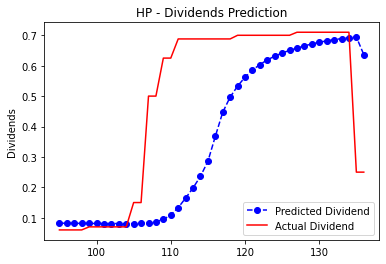

HRL - Testing Mean Squared Error - 0.00009


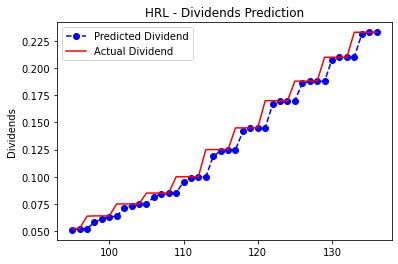

IBM - Testing Mean Squared Error - 0.00210


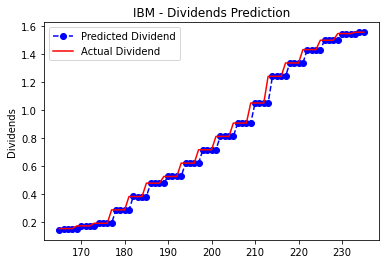

ITW - Testing Mean Squared Error - 0.00250


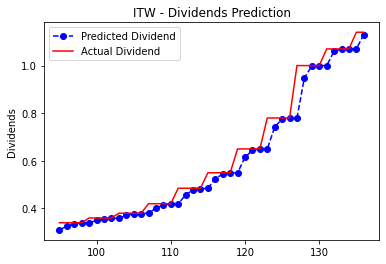

JKHY - Testing Mean Squared Error - 0.00052


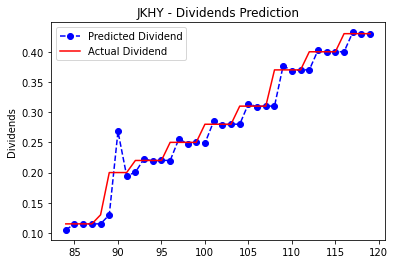

JNJ - Testing Mean Squared Error - 0.00044


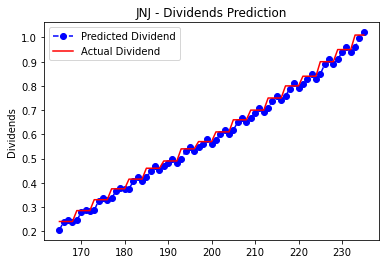

KMB - Testing Mean Squared Error - 0.00124


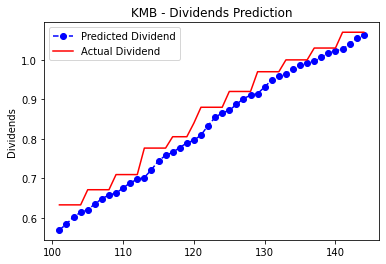

KO - Testing Mean Squared Error - 0.00008


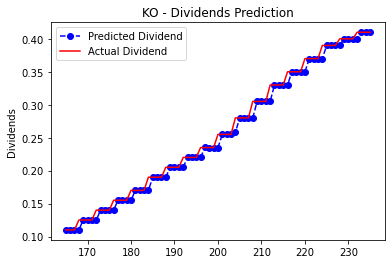

LANC - Testing Mean Squared Error - 1.26024


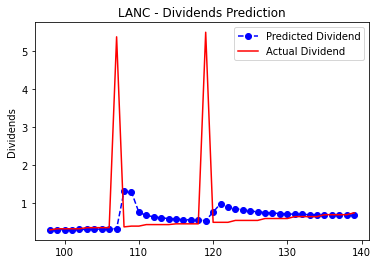

LECO - Testing Mean Squared Error - 0.00047


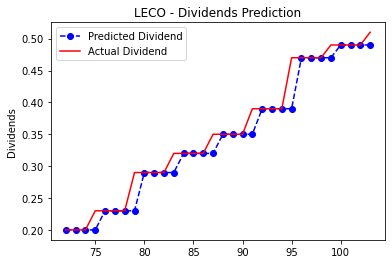

LEG - Testing Mean Squared Error - 0.00005


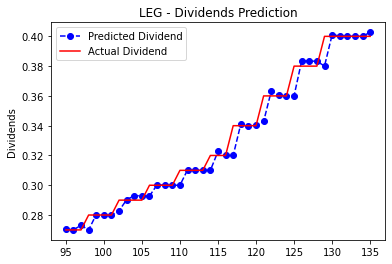

LIN - Testing Mean Squared Error - 0.00067


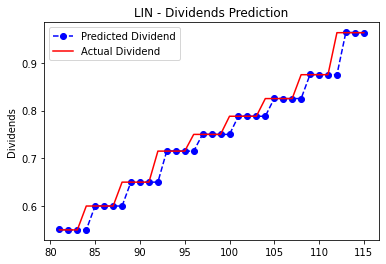

LOW - Testing Mean Squared Error - 0.00067


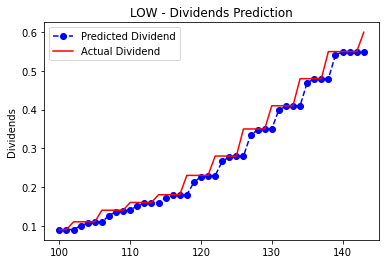

MATW - Testing Mean Squared Error - 0.00006


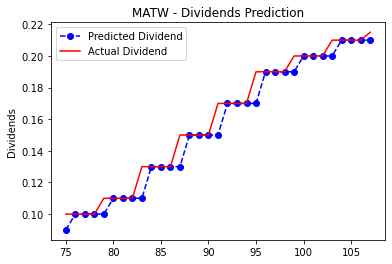

MCD - Testing Mean Squared Error - 0.03056


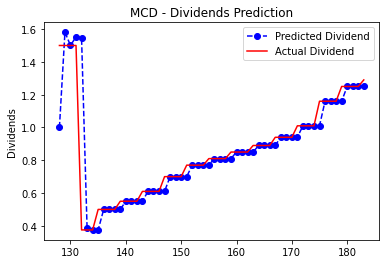

MCY - Testing Mean Squared Error - 0.00000


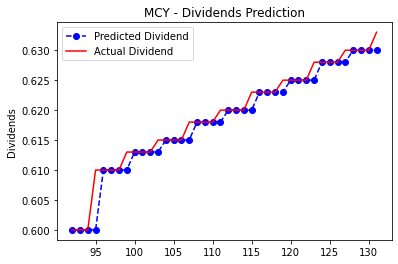

MDT - Testing Mean Squared Error - 0.00035


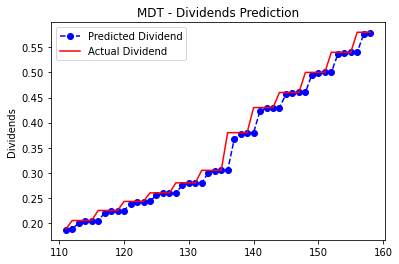

MDU - Testing Mean Squared Error - 0.00001


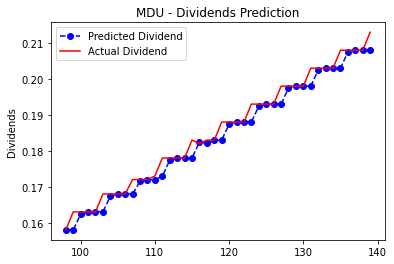

MGEE - Testing Mean Squared Error - 0.00004


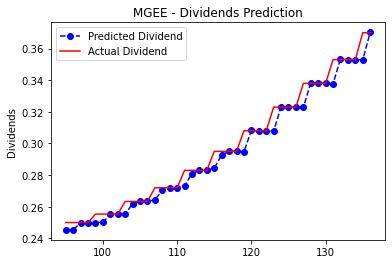

MGRC - Testing Mean Squared Error - 0.00026


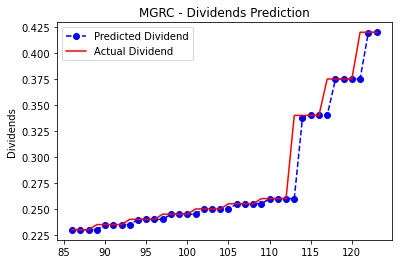

MKC - Testing Mean Squared Error - 0.00010


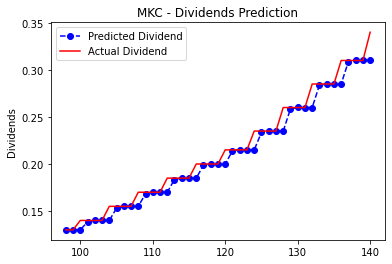

MMM - Testing Mean Squared Error - 0.00554


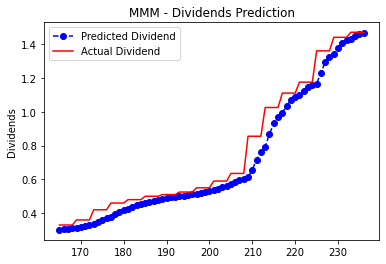

MO - Testing Mean Squared Error - 53.21573


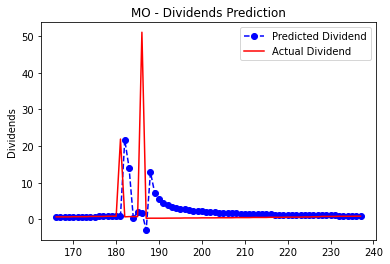

MSA - Testing Mean Squared Error - 0.00138


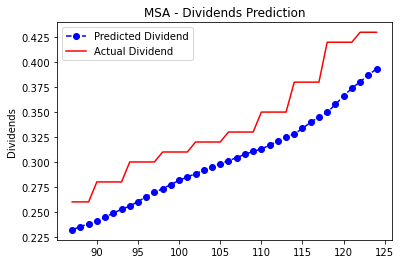

MSEX - Testing Mean Squared Error - 0.00004


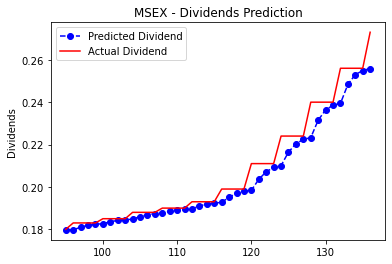

NC - Testing Mean Squared Error - 0.03631


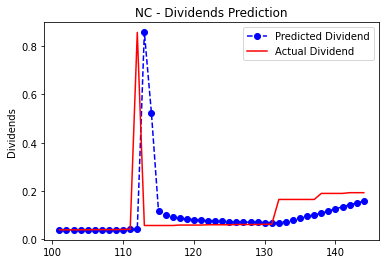

NDSN - Testing Mean Squared Error - 0.00022


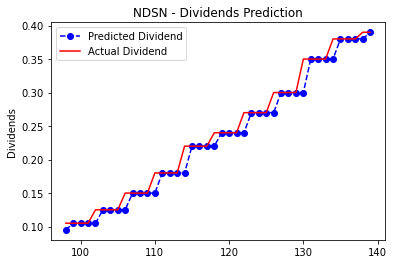

NEE - Testing Mean Squared Error - 0.00013


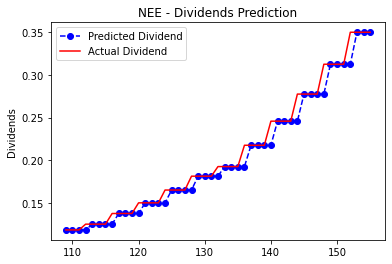

NFG - Testing Mean Squared Error - 0.00003


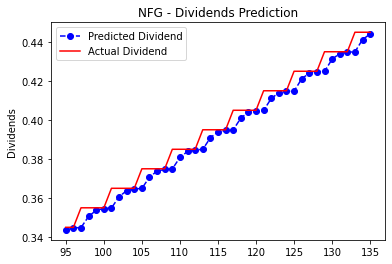

NIDB - Testing Mean Squared Error - 0.04740


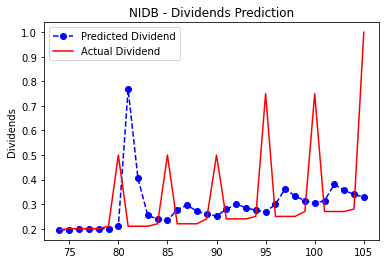

NJR - Testing Mean Squared Error - 0.00007


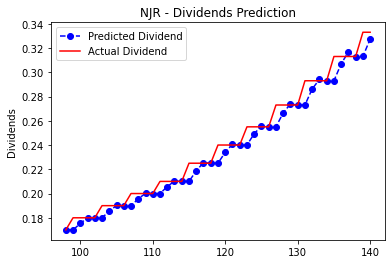

NNN - Testing Mean Squared Error - 0.00006


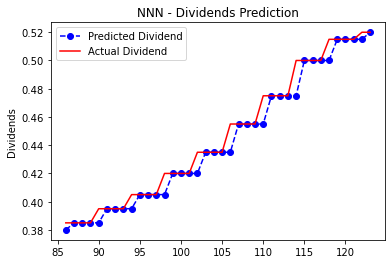

NUE - Testing Mean Squared Error - 0.00002


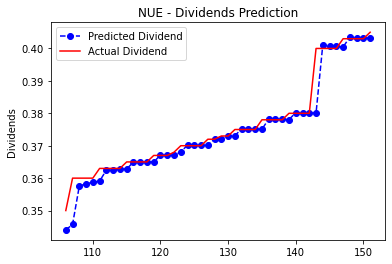

NWN - Testing Mean Squared Error - 0.00005


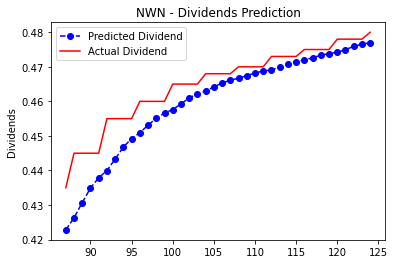

ORI - Testing Mean Squared Error - 0.04002


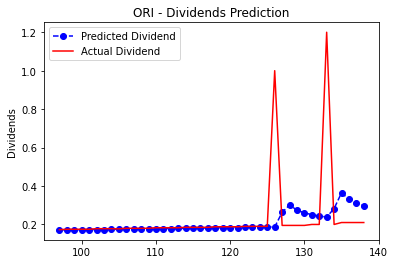

OZK - Testing Mean Squared Error - 0.00000


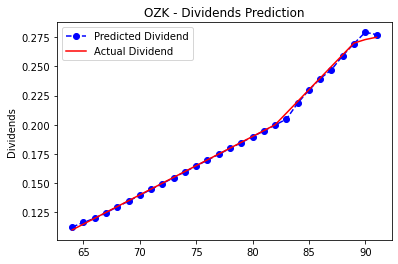

O - Testing Mean Squared Error - 0.00003


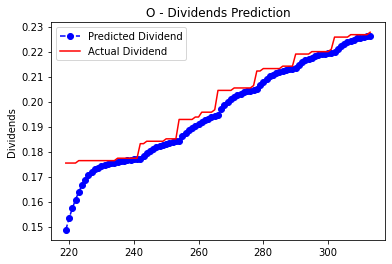

PBCT - Testing Mean Squared Error - 0.00000


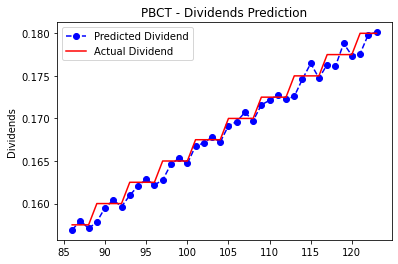

PBI - Testing Mean Squared Error - 0.00199


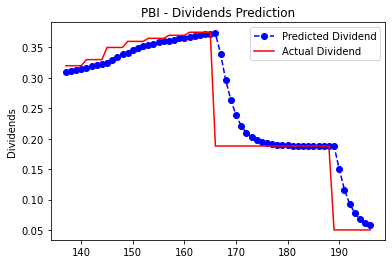

PEP - Testing Mean Squared Error - 0.01276


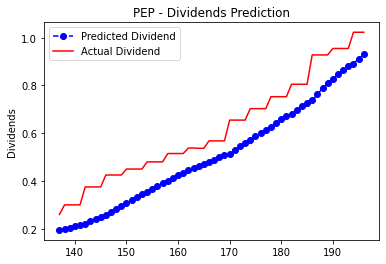

PG - Testing Mean Squared Error - 0.00040


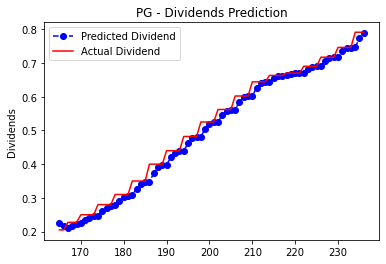

PH - Testing Mean Squared Error - 0.00121


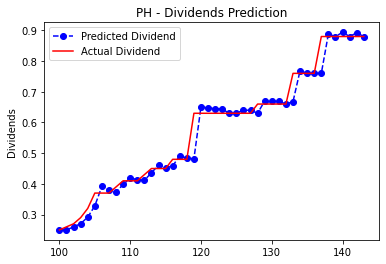

PII - Testing Mean Squared Error - 0.00151


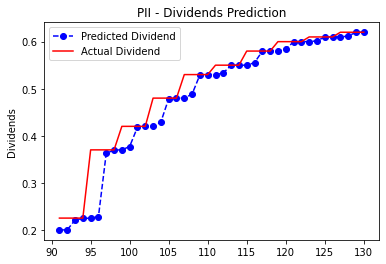

PNR - Testing Mean Squared Error - 0.00015


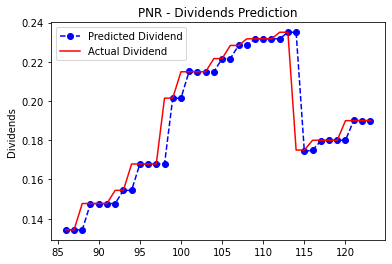

PPG - Testing Mean Squared Error - 0.00019


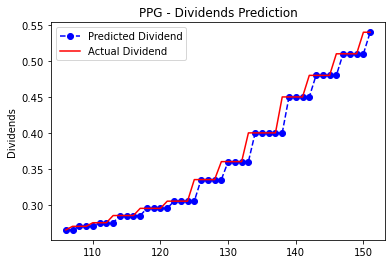

PSBQ - Testing Mean Squared Error - 0.00005


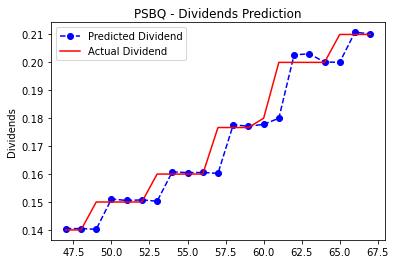

RLI - Testing Mean Squared Error - 1.47001


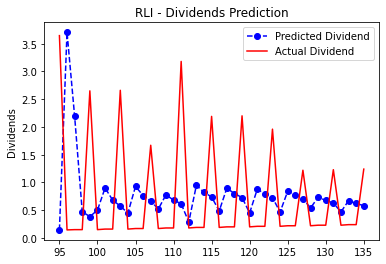

RNR - Testing Mean Squared Error - 0.00002


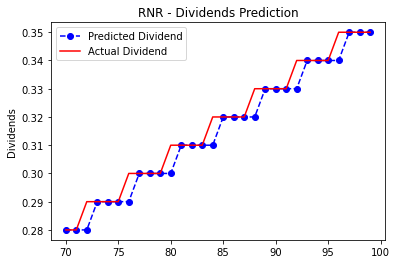

ROP - Testing Mean Squared Error - 0.00053


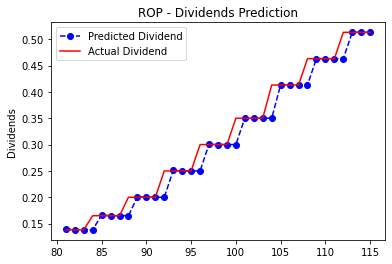

ROST - Testing Mean Squared Error - 0.00444


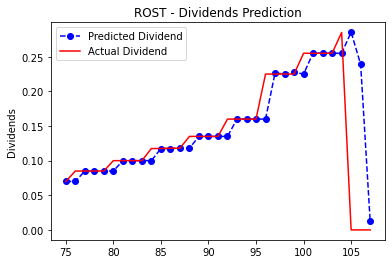

RPM - Testing Mean Squared Error - 0.00008


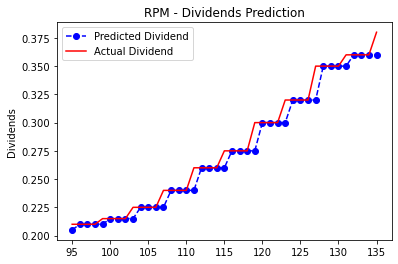

RTX - Testing Mean Squared Error - 0.00018


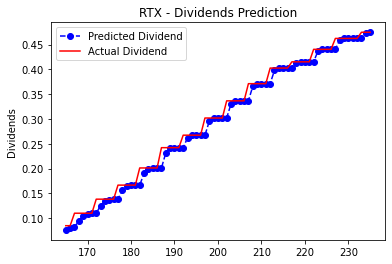

SBSI - Testing Mean Squared Error - 0.00116


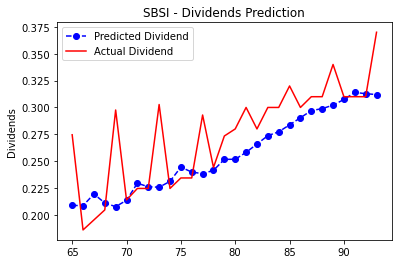

SCL - Testing Mean Squared Error - 0.00009


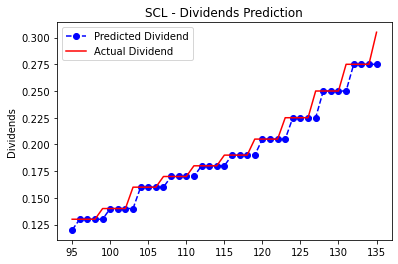

SEIC - Testing Mean Squared Error - 0.00509


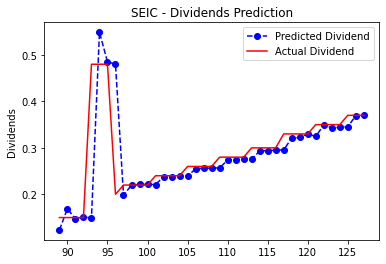

SHW - Testing Mean Squared Error - 0.00044


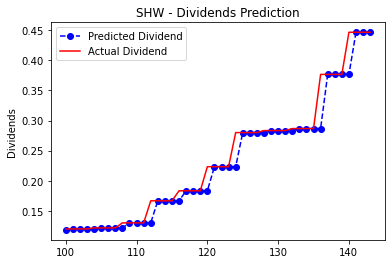

SJW - Testing Mean Squared Error - 0.00061


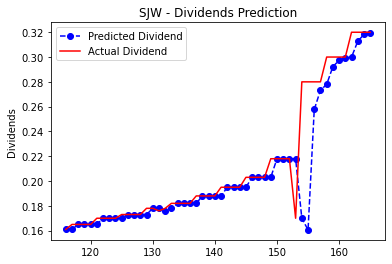

SKT - Testing Mean Squared Error - 0.00536


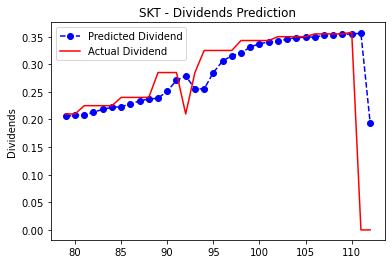

SON - Testing Mean Squared Error - 0.00008


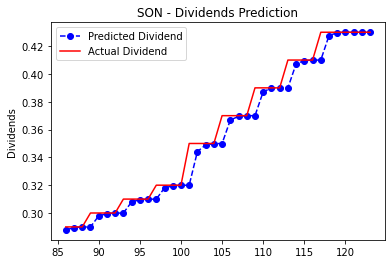

SPGI - Testing Mean Squared Error - 0.23046


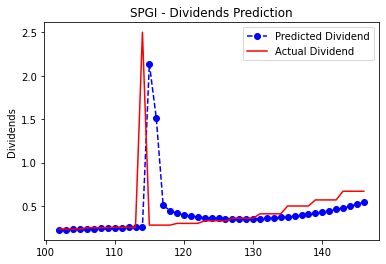

SRCE - Testing Mean Squared Error - 0.00006


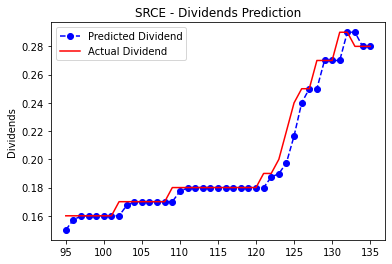

SWK - Testing Mean Squared Error - 0.00110


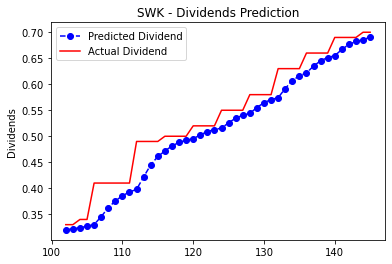

SYK - Testing Mean Squared Error - 0.00055


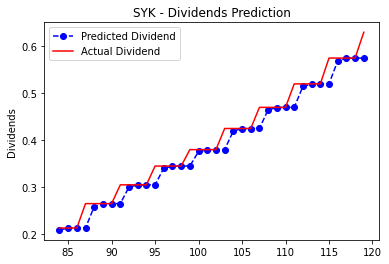

SYY - Testing Mean Squared Error - 0.00014


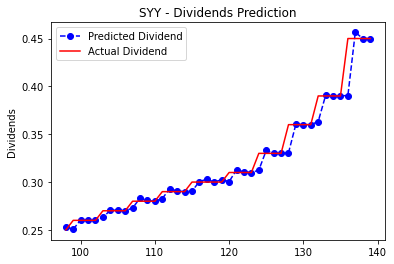

TDS - Testing Mean Squared Error - 0.00002


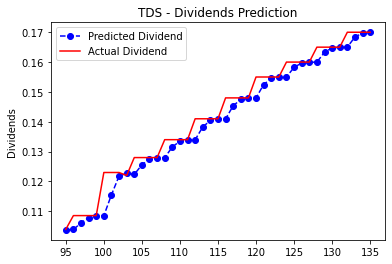

TGT - Testing Mean Squared Error - 0.00066


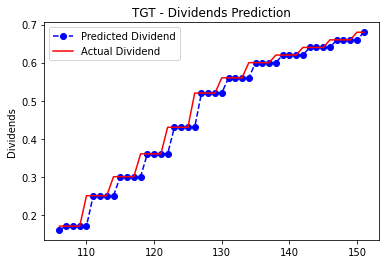

THFF - Testing Mean Squared Error - 0.05692


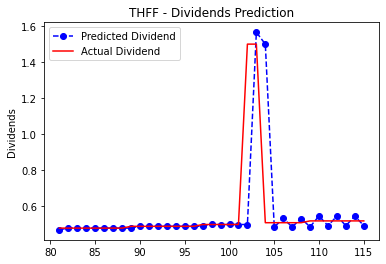

TMP - Testing Mean Squared Error - 0.00877


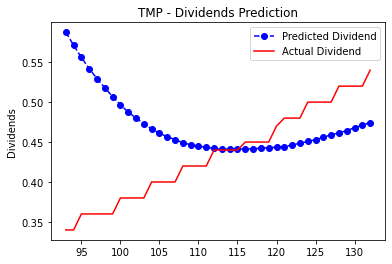

TNC - Testing Mean Squared Error - 0.00004


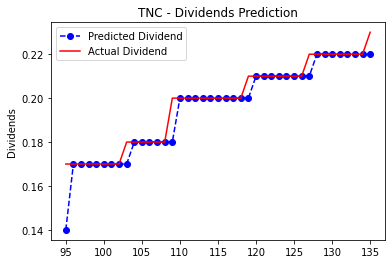

TRI - Testing Mean Squared Error - 0.00008


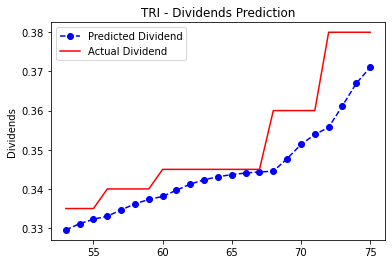

TROW - Testing Mean Squared Error - 0.09673


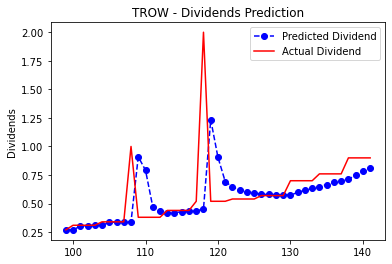

TR - Testing Mean Squared Error - 0.00425


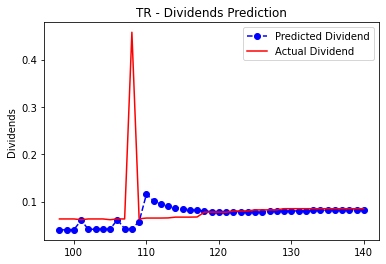

TYCB - Testing Mean Squared Error - 0.09759


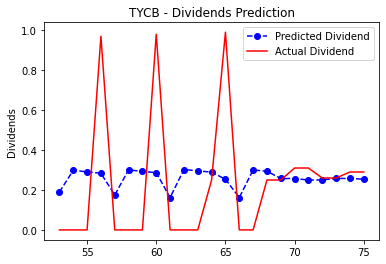

T - Testing Mean Squared Error - 0.00001


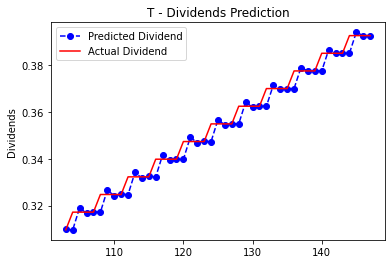

UBA - Testing Mean Squared Error - 0.00462


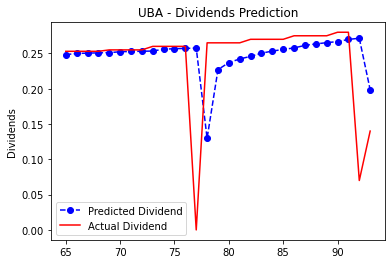

UBSI - Testing Mean Squared Error - 0.00001


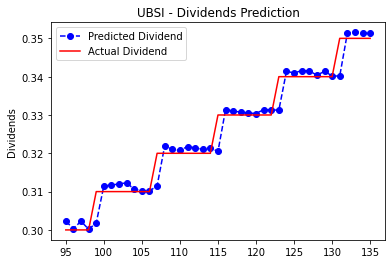

UGI - Testing Mean Squared Error - 0.00010


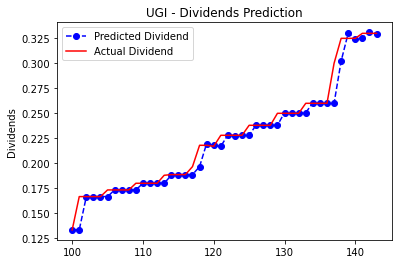

UHT - Testing Mean Squared Error - 0.00001


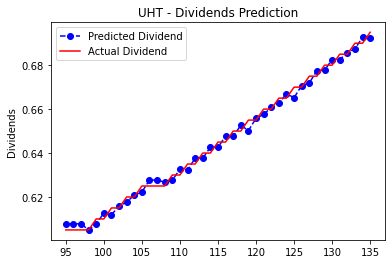

UMBF - Testing Mean Squared Error - 0.00009


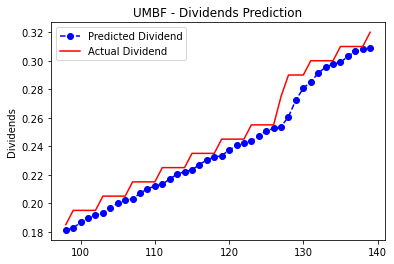

UVV - Testing Mean Squared Error - 0.00098


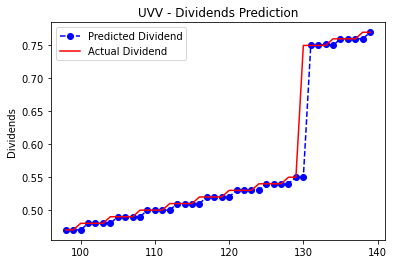

VFC - Testing Mean Squared Error - 0.00057


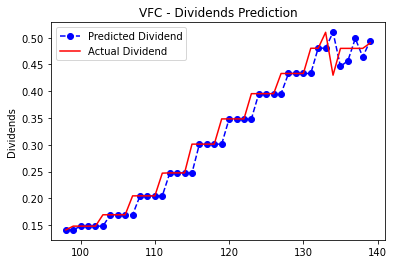

WABC - Testing Mean Squared Error - 0.00001


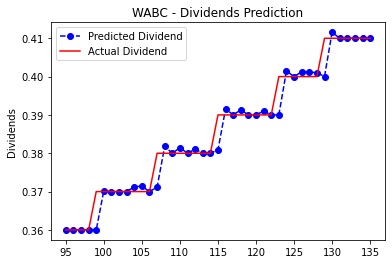

WBA - Testing Mean Squared Error - 0.00027


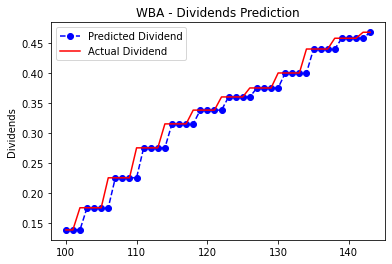

WEYS - Testing Mean Squared Error - 0.00002


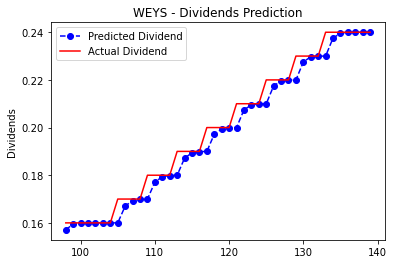

WGL - Testing Mean Squared Error - 0.00654


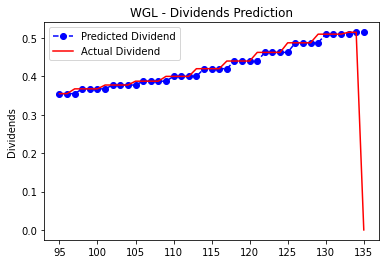

WMT - Testing Mean Squared Error - 0.00028


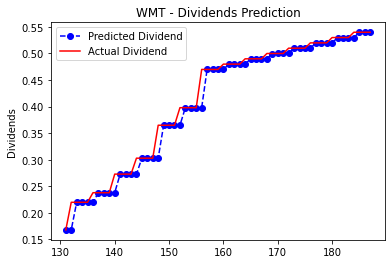

WRE - Testing Mean Squared Error - 0.00047


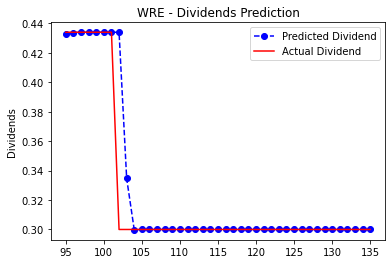

WST - Testing Mean Squared Error - 0.00002


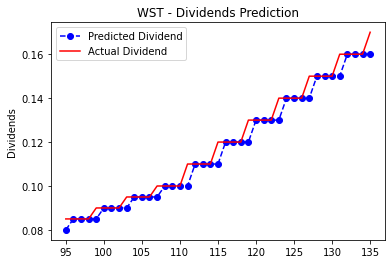

WTRG - Testing Mean Squared Error - 0.00004


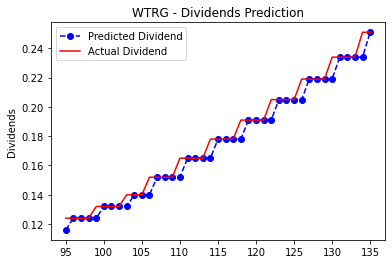

In [4]:
for i in range(1, len(dividend_files) - 1):
    file = dividend_files[i]
    company = file.split('_')[0]
    
    df = pd.read_csv("./data/series/good/" + file)
    df.rename(columns = {'0': 'Dividends'}, inplace = True)
    dividends = df['Dividends']
    diff_dividends = dividends.diff(1).dropna()
    
    # ARIMA
    train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]    # split train and test data
    training_data = train_data['Dividends'].values   
    test_data = test_data['Dividends'].values
    history = [x for x in training_data]    # make list of training data
    model_predictions = []

    for time_point in range(len(test_data)):
        model = ARIMA(history, order=(1, 1, 1))
        model_fit = model.fit(method_kwargs={"warn_convergence": False})    # fit model
        output = model_fit.forecast()    # get out-of-sample forecasts (predictions)
        yhat = output[0]    # get value from array
        model_predictions.append(yhat)    # list of model predictions
        true_test_value = test_data[time_point]    # get true value
        history.append(true_test_value)    # append to history (training data)

    MSE_error = mean_squared_error(test_data, model_predictions)
    print(f'{company} - Testing Mean Squared Error - {MSE_error:.5f}')
    
    test_set_range = df[int(len(df)*0.7):].index
    plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Dividend')
    plt.plot(test_set_range, test_data, color='red', label='Actual Dividend')
    plt.title(f'{company} - Dividends Prediction')
    #plt.xlabel('Date')
    plt.ylabel('Dividends')
    #plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
    plt.legend()
    plt.show()